### Homework

1. **Tokenization** 

Write a generic Python tokenizer, which takes a set of text lines and tabulates the different words (that is, the tokens will be simply English words), keeping track of the frequency of each word.  Use the guidance in the accompanying notebook, 'Homework_1.ipynb'.

2. **Embedding**

Modify the embedding visualization code above to zoom in on various regions of the projections, and identify at least one interesting cluster of tokens.

Before you begin, make sure that you have your environment set up and your repo refreshed, as described in previous lessons, and reviewed in the accompanying 'Readme.md' file. Make sure that you select the kernel 'datascience/conda-2023-01-10' at the top-left of the Jupyter notebook.

# Homework:  Problem 1 - Tokenization: Part 1 

In [1]:
import string
import re

In [2]:
# Part 1

# "encoding='utf8'" added to fix the error when running on Windows

wdict = {}
with open('Life_On_The_Mississippi.txt', 'r', encoding='utf8') as L:
    line = L.readline()
    nlines = 1
    while line:
        line = re.sub(r"[^\x00-\x7F]+", " ", line) \
            .translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) \
            .lower() 

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        nlines += 1
        line = L.readline()

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('the', 9367)
('project', 90)
('gutenberg', 97)
('ebook', 13)
('of', 4546)
('life', 95)
('on', 962)
('mississippi', 169)
('this', 795)
('is', 1163)
('for', 1123)
('use', 51)
('anyone', 5)
('anywhere', 18)
('in', 2622)
('united', 37)
('states', 51)
('and', 6032)
('most', 125)
('other', 277)
('parts', 9)
('world', 75)
('at', 755)
('no', 447)
('cost', 26)
('with', 1096)
('almost', 38)
('restrictions', 2)
('whatsoever', 2)
('you', 1115)
('may', 92)
('copy', 17)
('it', 2403)
('give', 83)
('away', 176)
('or', 592)
('re', 23)
('under', 122)
('terms', 27)
('license', 27)
('included', 3)
('online', 4)
('www', 9)
('org', 9)
('if', 384)
('are', 389)
('not', 735)
('located', 9)
('will', 303)
('have', 572)
('to', 3631)
('check', 4)
('laws', 20)
('country', 77)
('where', 180)
('before', 214)
('using', 11)
('title', 3)
('author', 3)
('mark', 21)
('twain', 28)
('release', 1)
('date', 18)
('july', 7)
('10', 11)
('2004', 1)
('245', 1)
('recently', 4)
('updated', 2)
('january', 3)
('1', 62)
('2021', 1)
(

# Homework:  Problem 1 - Tokenization: Part 2 

In [3]:
# Part 2

# finding the top 100 most frequent word tokens
wdict_sorted = dict(sorted(wdict.items(), key=lambda item: item[1], reverse=True))
nitem = 0 ; maxitems = 100
for item in wdict_sorted.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('the', 9367)
('and', 6032)
('of', 4546)
('a', 4235)
('to', 3631)
('in', 2622)
('it', 2403)
('i', 2376)
('was', 2103)
('that', 1789)
('he', 1448)
('is', 1163)
('for', 1123)
('you', 1115)
('with', 1096)
('but', 988)
('his', 967)
('on', 962)
('had', 962)
('as', 889)
('this', 795)
('they', 782)
('at', 755)
('by', 744)
('all', 738)
('not', 735)
('one', 729)
('s', 711)
('there', 675)
('were', 627)
('be', 620)
('or', 592)
('my', 587)
('from', 581)
('have', 572)
('so', 558)
('out', 554)
('we', 551)
('up', 551)
('me', 536)
('him', 533)
('when', 506)
('river', 500)
('which', 491)
('would', 482)
('t', 477)
('an', 458)
('no', 447)
('them', 432)
('then', 419)
('said', 404)
('are', 389)
('if', 384)
('now', 382)
('their', 378)
('time', 356)
('about', 353)
('down', 344)
('been', 336)
('could', 314)
('what', 313)
('has', 306)
('two', 304)
('will', 303)
('into', 300)
('man', 288)
('her', 283)
('its', 281)
('other', 277)
('some', 276)
('do', 276)
('new', 270)
('she', 250)
('water', 249)
('any', 241)
('m

In [4]:
# calculating number of distinct words that make up the top 90% of word occurrences
total_word_occurrences = sum(wdict_sorted.values())
top_word_occurrences = 0; nitem = 0
for item in wdict_sorted.items():
    nitem += 1
    top_word_occurrences += item[1]
    if top_word_occurrences >= 0.90*total_word_occurrences: break
print("Total number of words in this 'corpus':", total_word_occurrences)
print("Total number of lines:", nlines)
print("Total number of distinct words:", len(wdict_sorted))
print("Number of distinct words that make up the top 90% of word occurrences:", nitem)

Total number of words in this 'corpus': 152335
Total number of lines: 15196
Total number of distinct words: 12224
Number of distinct words that make up the top 90% of word occurrences: 3077


# Homework:  Problem 2 - Embedding

In [5]:
%matplotlib inline
seed_value = 888
import torch
torch.manual_seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary


2024-04-07 00:01:35.104031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/soft/datascience/conda/2023-01-10/mconda3/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_rel

The vocabulary size is:  30522


In [6]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)


(30522, 1024)


So the array bertwordembs contains 30522 vectors of size 1024, the latter being the dimension of the embedding space.

The visualization of this data will be carried out by means of a projection to 2 dimensions by an algorithm called "t-SNE" ("t-distributed stochastic neighbor embedding"), which attempts to keep "similar" (in the high-dimensional space) points together, while spreading apart in the 2-dimensional projection points that are distant from each other in the high-dimensional space.

In [7]:
# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

4000
10000


That is to say, 10000 words will be used to compute the t-SNE data, but only 4000 of them will be plotted. We're ready to run the t-SNE projection.

In [8]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.352s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.178s
[t-SNE] Iteration 50: error = 97.8547592, gradient norm = 0.0070260 (50 iterations in 0.583s)
[t-SNE] It

<function matplotlib.pyplot.show(close=None, block=None)>

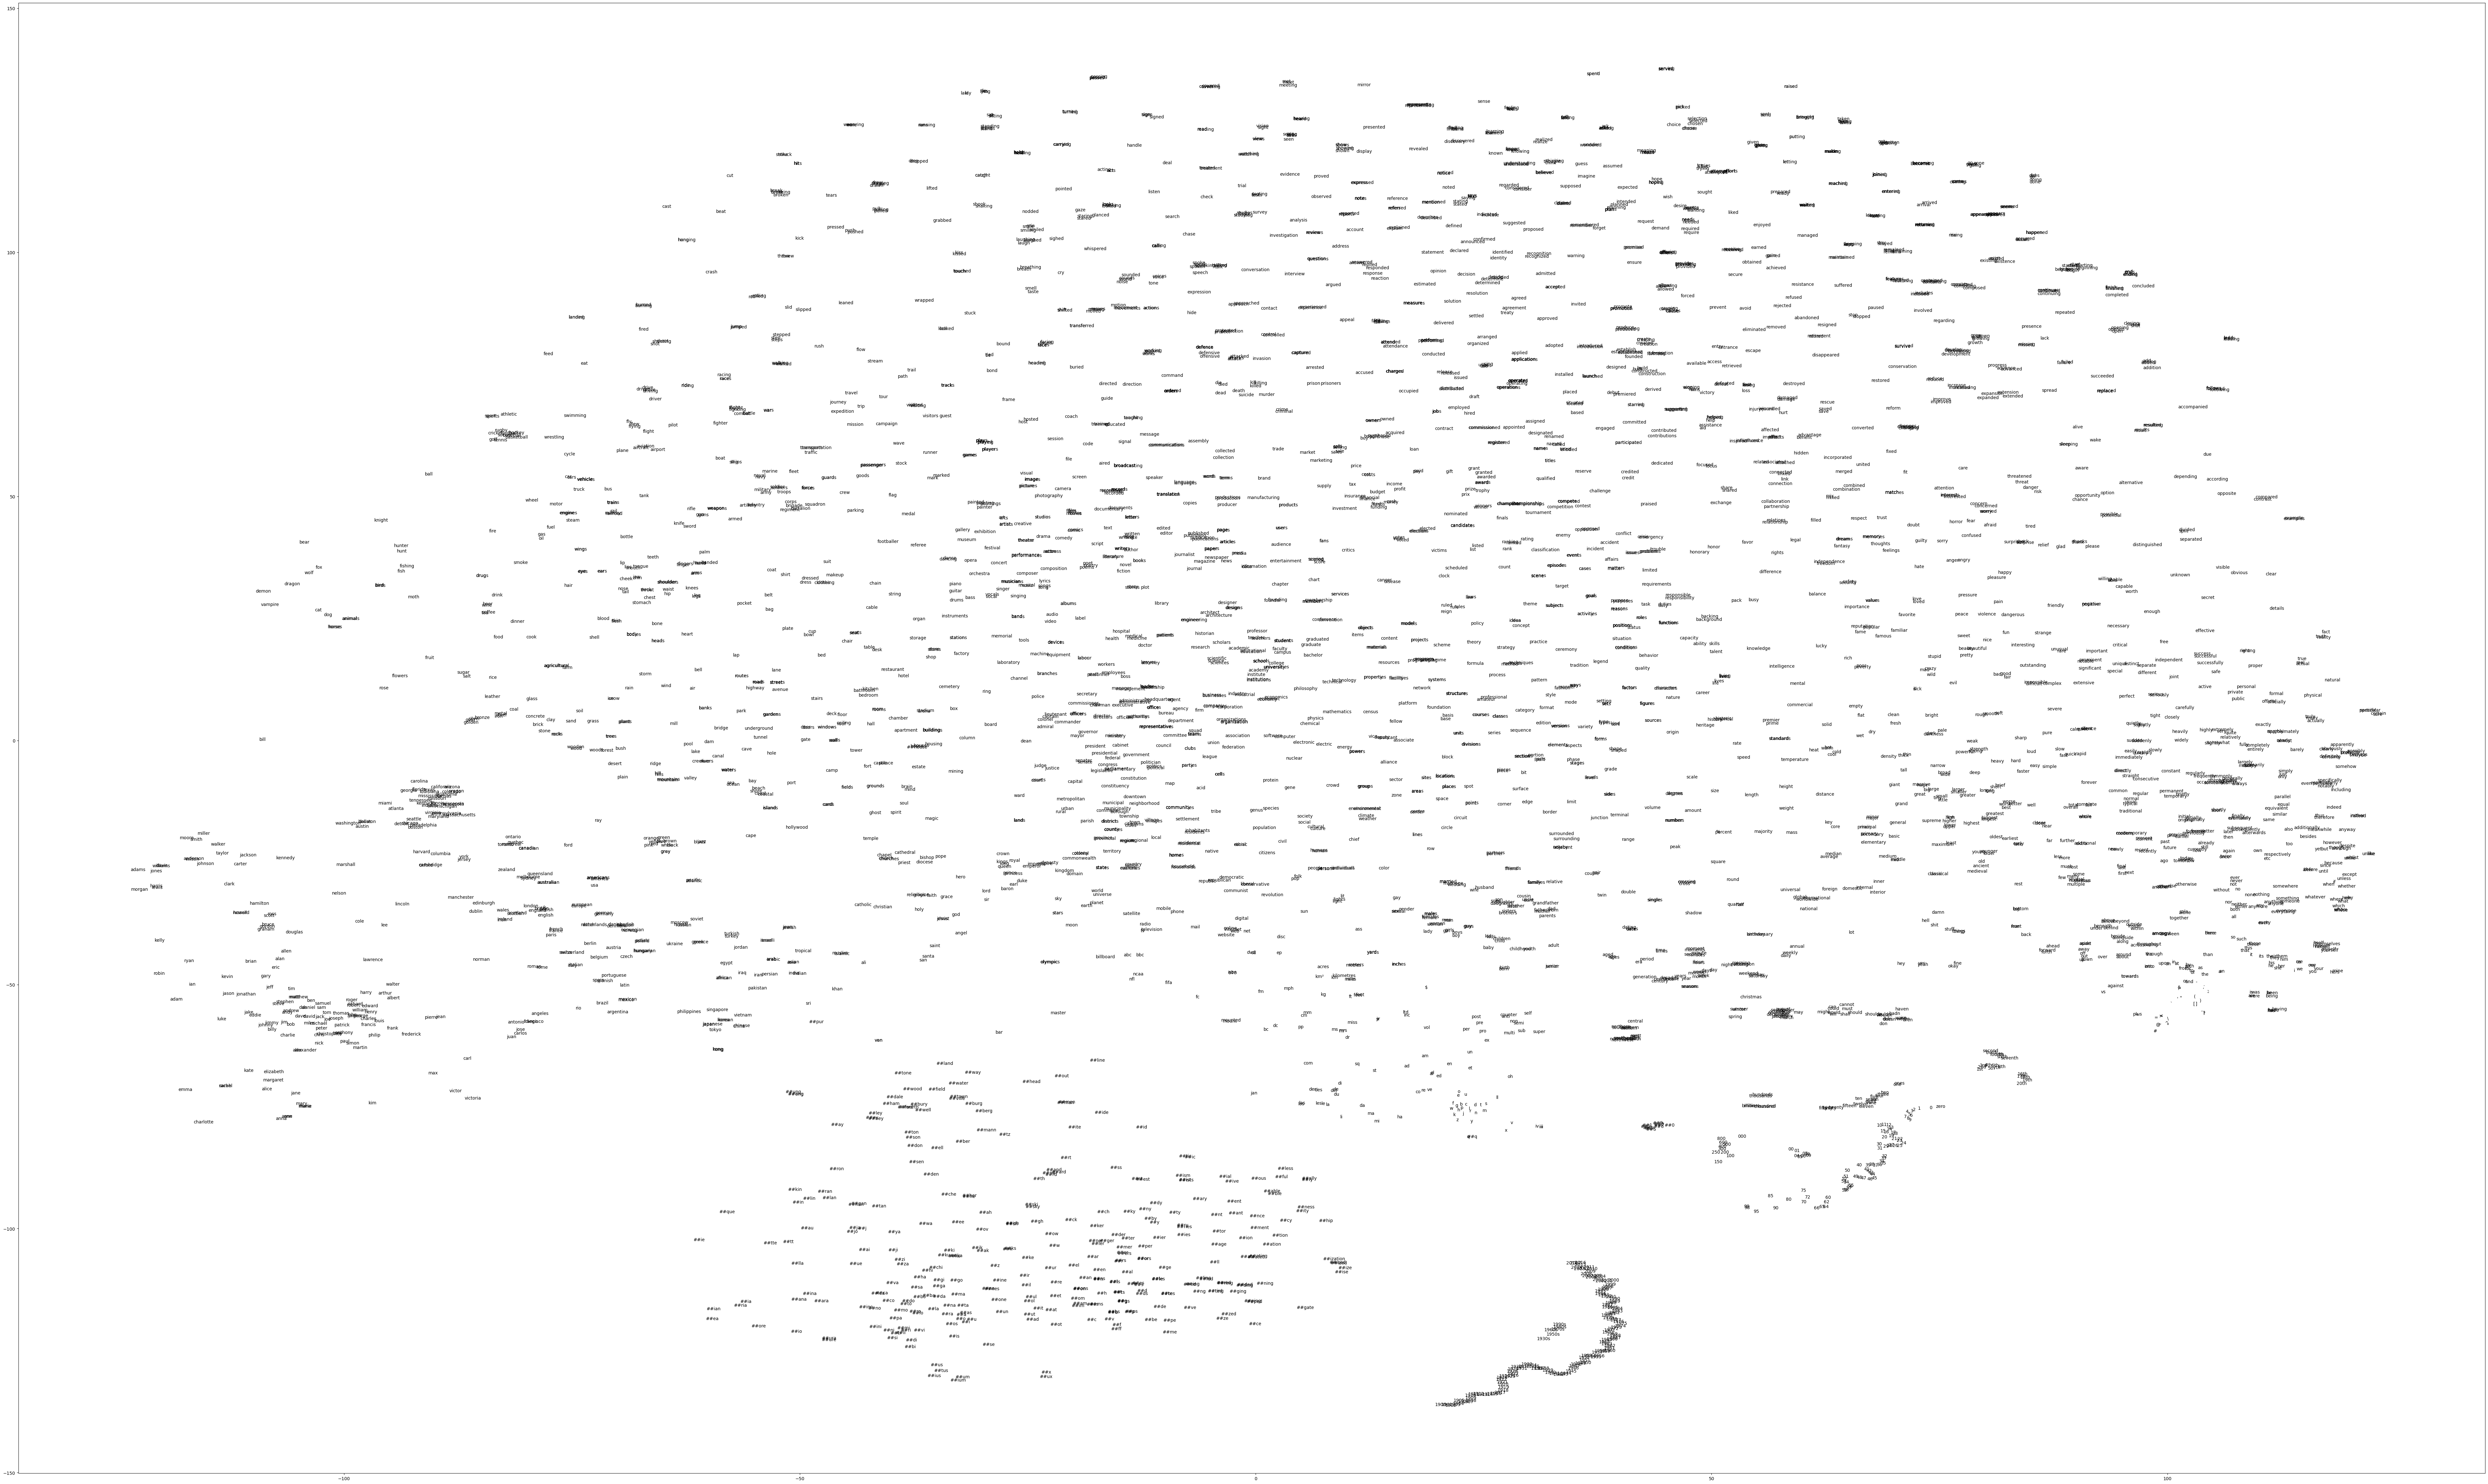

In [9]:
# Plot the transformed BERT vocabulary embeddings:
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
    alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('viz-bert-voc-tsne10k-viz4k-noadj.pdf', format='pdf')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

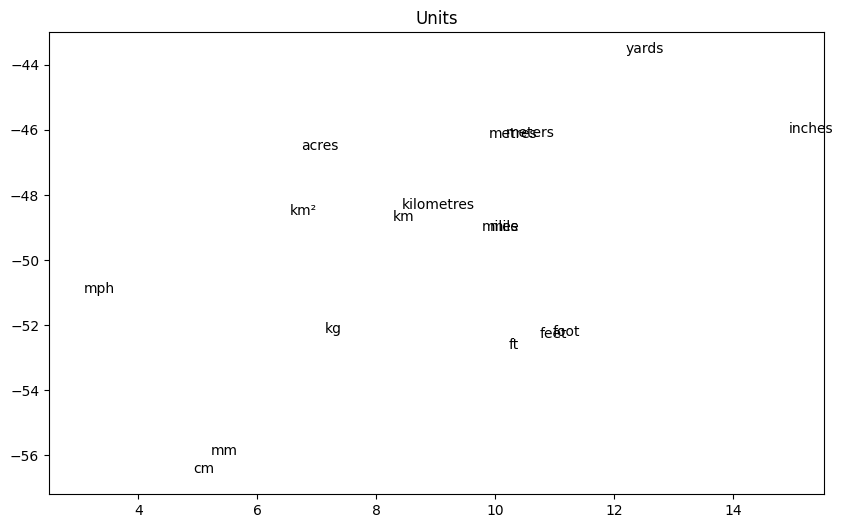

In [10]:
# Plot units:
x_left = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "mph",0].item()
x_right = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "inches",0].item()
y_top = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "yards",1].item()
y_bottom = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "cm",1].item()

#x_left, x_right = min(x_left, x_right), max(x_left, x_right)
#y_bottom, y_top = min(y_bottom, y_top), max(y_bottom, y_top)

plt.rcParams['figure.figsize'] = [10, 6]
fig = plt.figure()
plt.title("Units")
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    if (x_left <= bert_word_embs_to_use_tsne[i,0] <= x_right) \
        & (y_bottom <= bert_word_embs_to_use_tsne[i,1] <= y_top):
    
        plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
        currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
        alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('Units.pdf', format='pdf')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

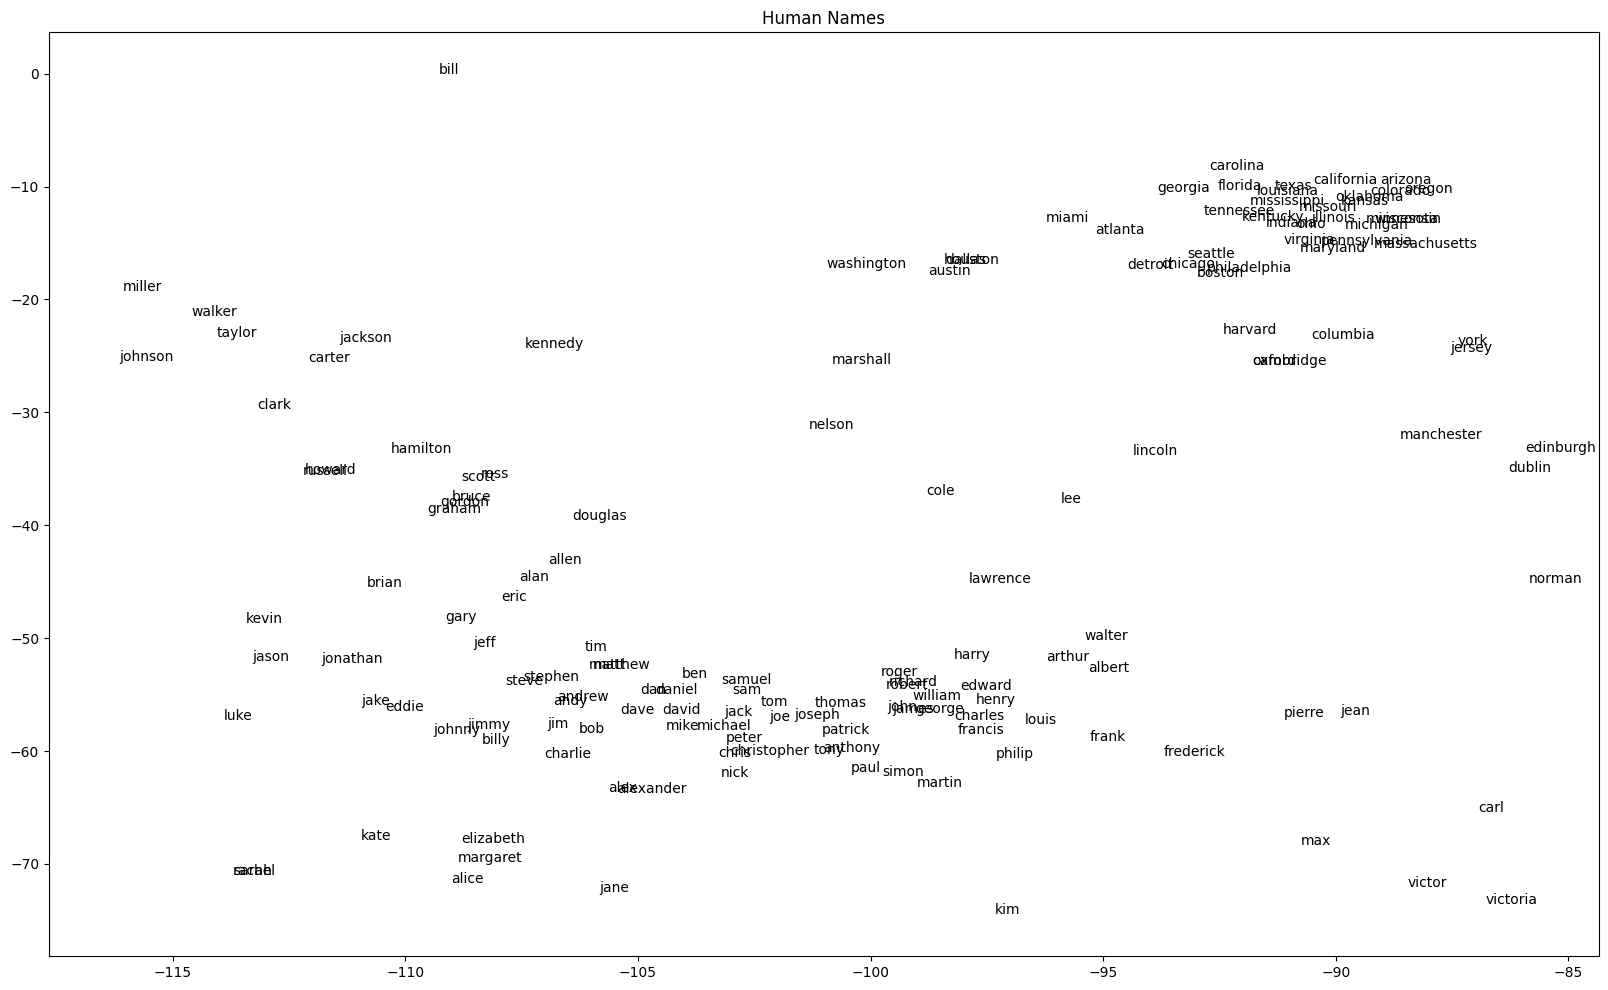

In [11]:
# Plot human names:
x_left = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "charlotte",0].item()
x_right = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "norman",0].item()
y_top = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "bill",1].item()
y_bottom = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "kim",1].item()

#x_left, x_right = min(x_left, x_right), max(x_left, x_right)
#y_bottom, y_top = min(y_bottom, y_top), max(y_bottom, y_top)

plt.rcParams['figure.figsize'] = [20, 12]
fig = plt.figure()
plt.title("Human Names")
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    if (x_left <= bert_word_embs_to_use_tsne[i,0] <= x_right) \
        & (y_bottom <= bert_word_embs_to_use_tsne[i,1] <= y_top):
    
        plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], s=0)
        currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
        alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('Numan Names.pdf', format='pdf')

plt.show

In [12]:
from sklearn.cluster import KMeans 

<function matplotlib.pyplot.show(close=None, block=None)>

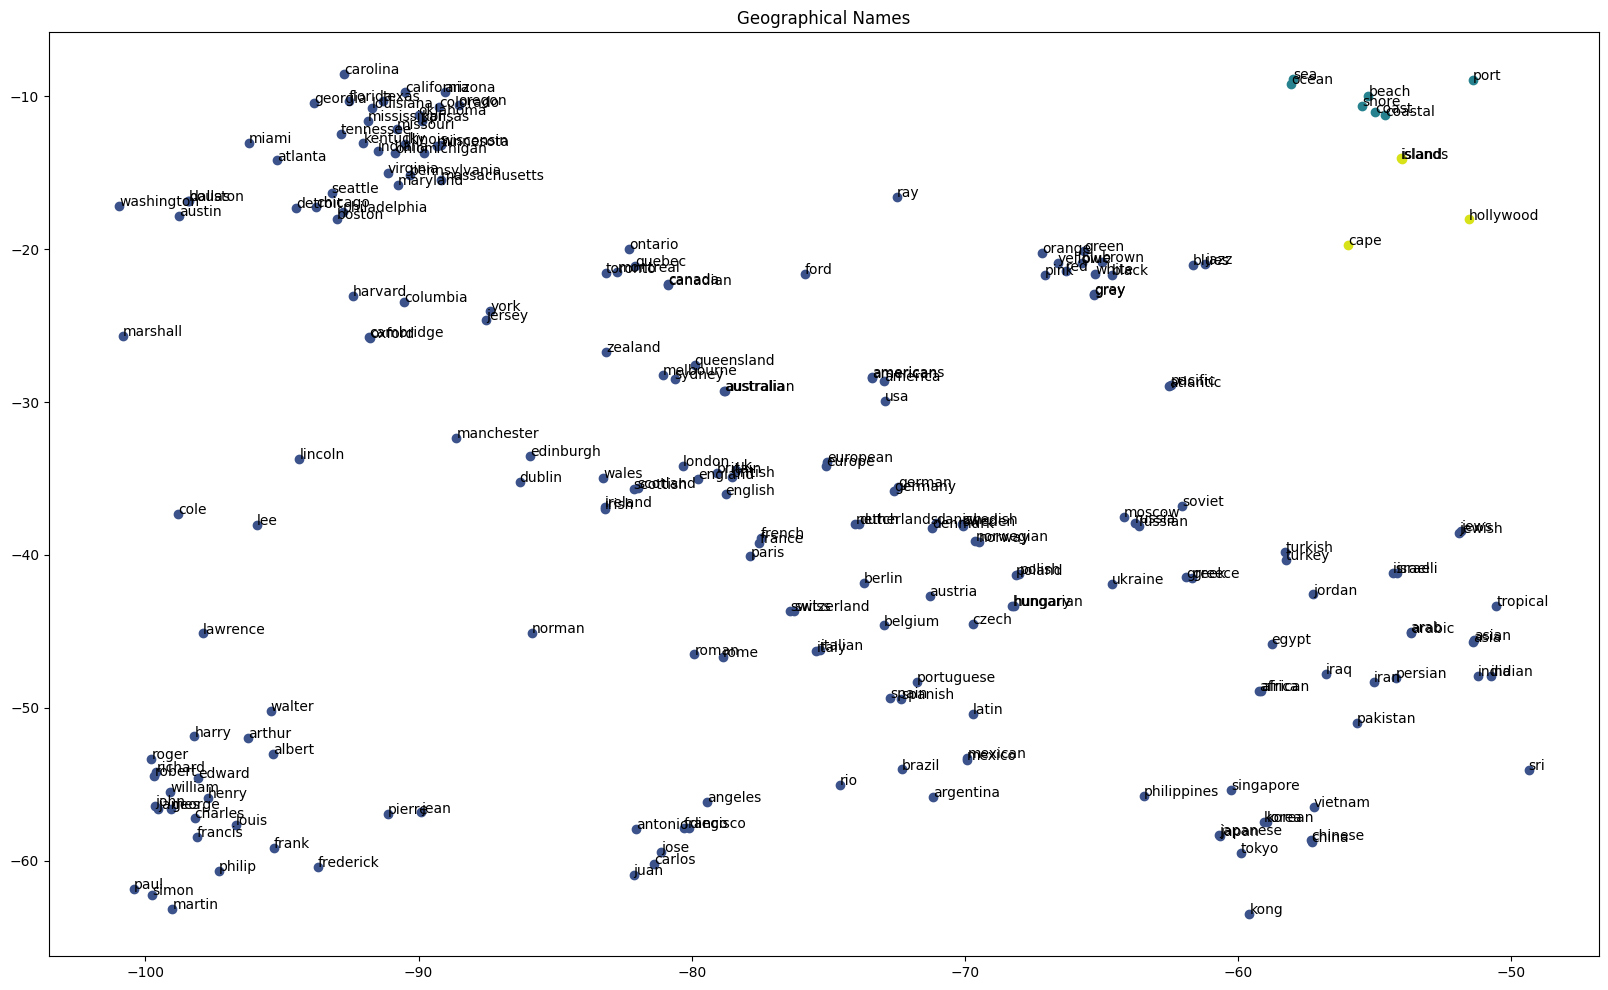

In [13]:
# Plot geographical names:
x_left = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "washington",0].item()
x_right = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "sri",0].item()
y_top = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "kong",1].item()
y_bottom = bert_word_embs_to_use_tsne[0:len(bert_words_to_plot)][bert_words_to_plot == "carolina",1].item()

x_left, x_right = min(x_left, x_right), max(x_left, x_right)
y_bottom, y_top = min(y_bottom, y_top), max(y_bottom, y_top)

kmeans = KMeans(n_clusters=17, n_init='auto')
kmeans.fit(bert_word_embs_to_use_tsne[:4000])

plt.rcParams['figure.figsize'] = [20, 12]
fig = plt.figure()
plt.title("Geographical Names")
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    if (x_left <= bert_word_embs_to_use_tsne[i,0] <= x_right) \
        & (y_bottom <= bert_word_embs_to_use_tsne[i,1] <= y_top):
    
        plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], c=kmeans.labels_[i], vmin = min(kmeans.labels_), vmax = max(kmeans.labels_)) #s=0, 
        currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif')
        alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('Geographical Names.pdf', format='pdf')

plt.show

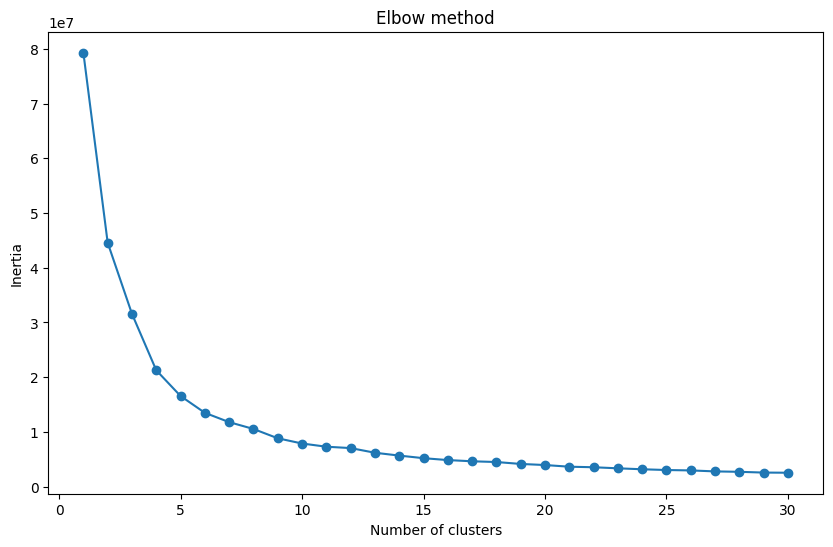

In [14]:
inertias = []

for i in range(1,31):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(bert_word_embs_to_use_tsne) # fit_predict
    inertias.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(range(1,31), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

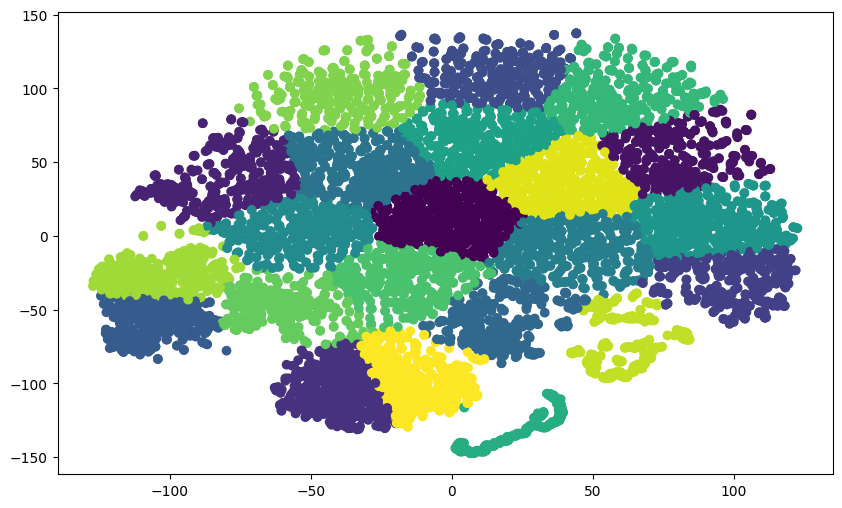

In [15]:
kmeans = KMeans(n_clusters=22, n_init='auto')
kmeans.fit(bert_word_embs_to_use_tsne)

plt.rcParams['figure.figsize'] = [10, 6]
plt.scatter(bert_word_embs_to_use_tsne[:,0], bert_word_embs_to_use_tsne[:,1], c=kmeans.labels_)
plt.show() 

<function matplotlib.pyplot.show(close=None, block=None)>

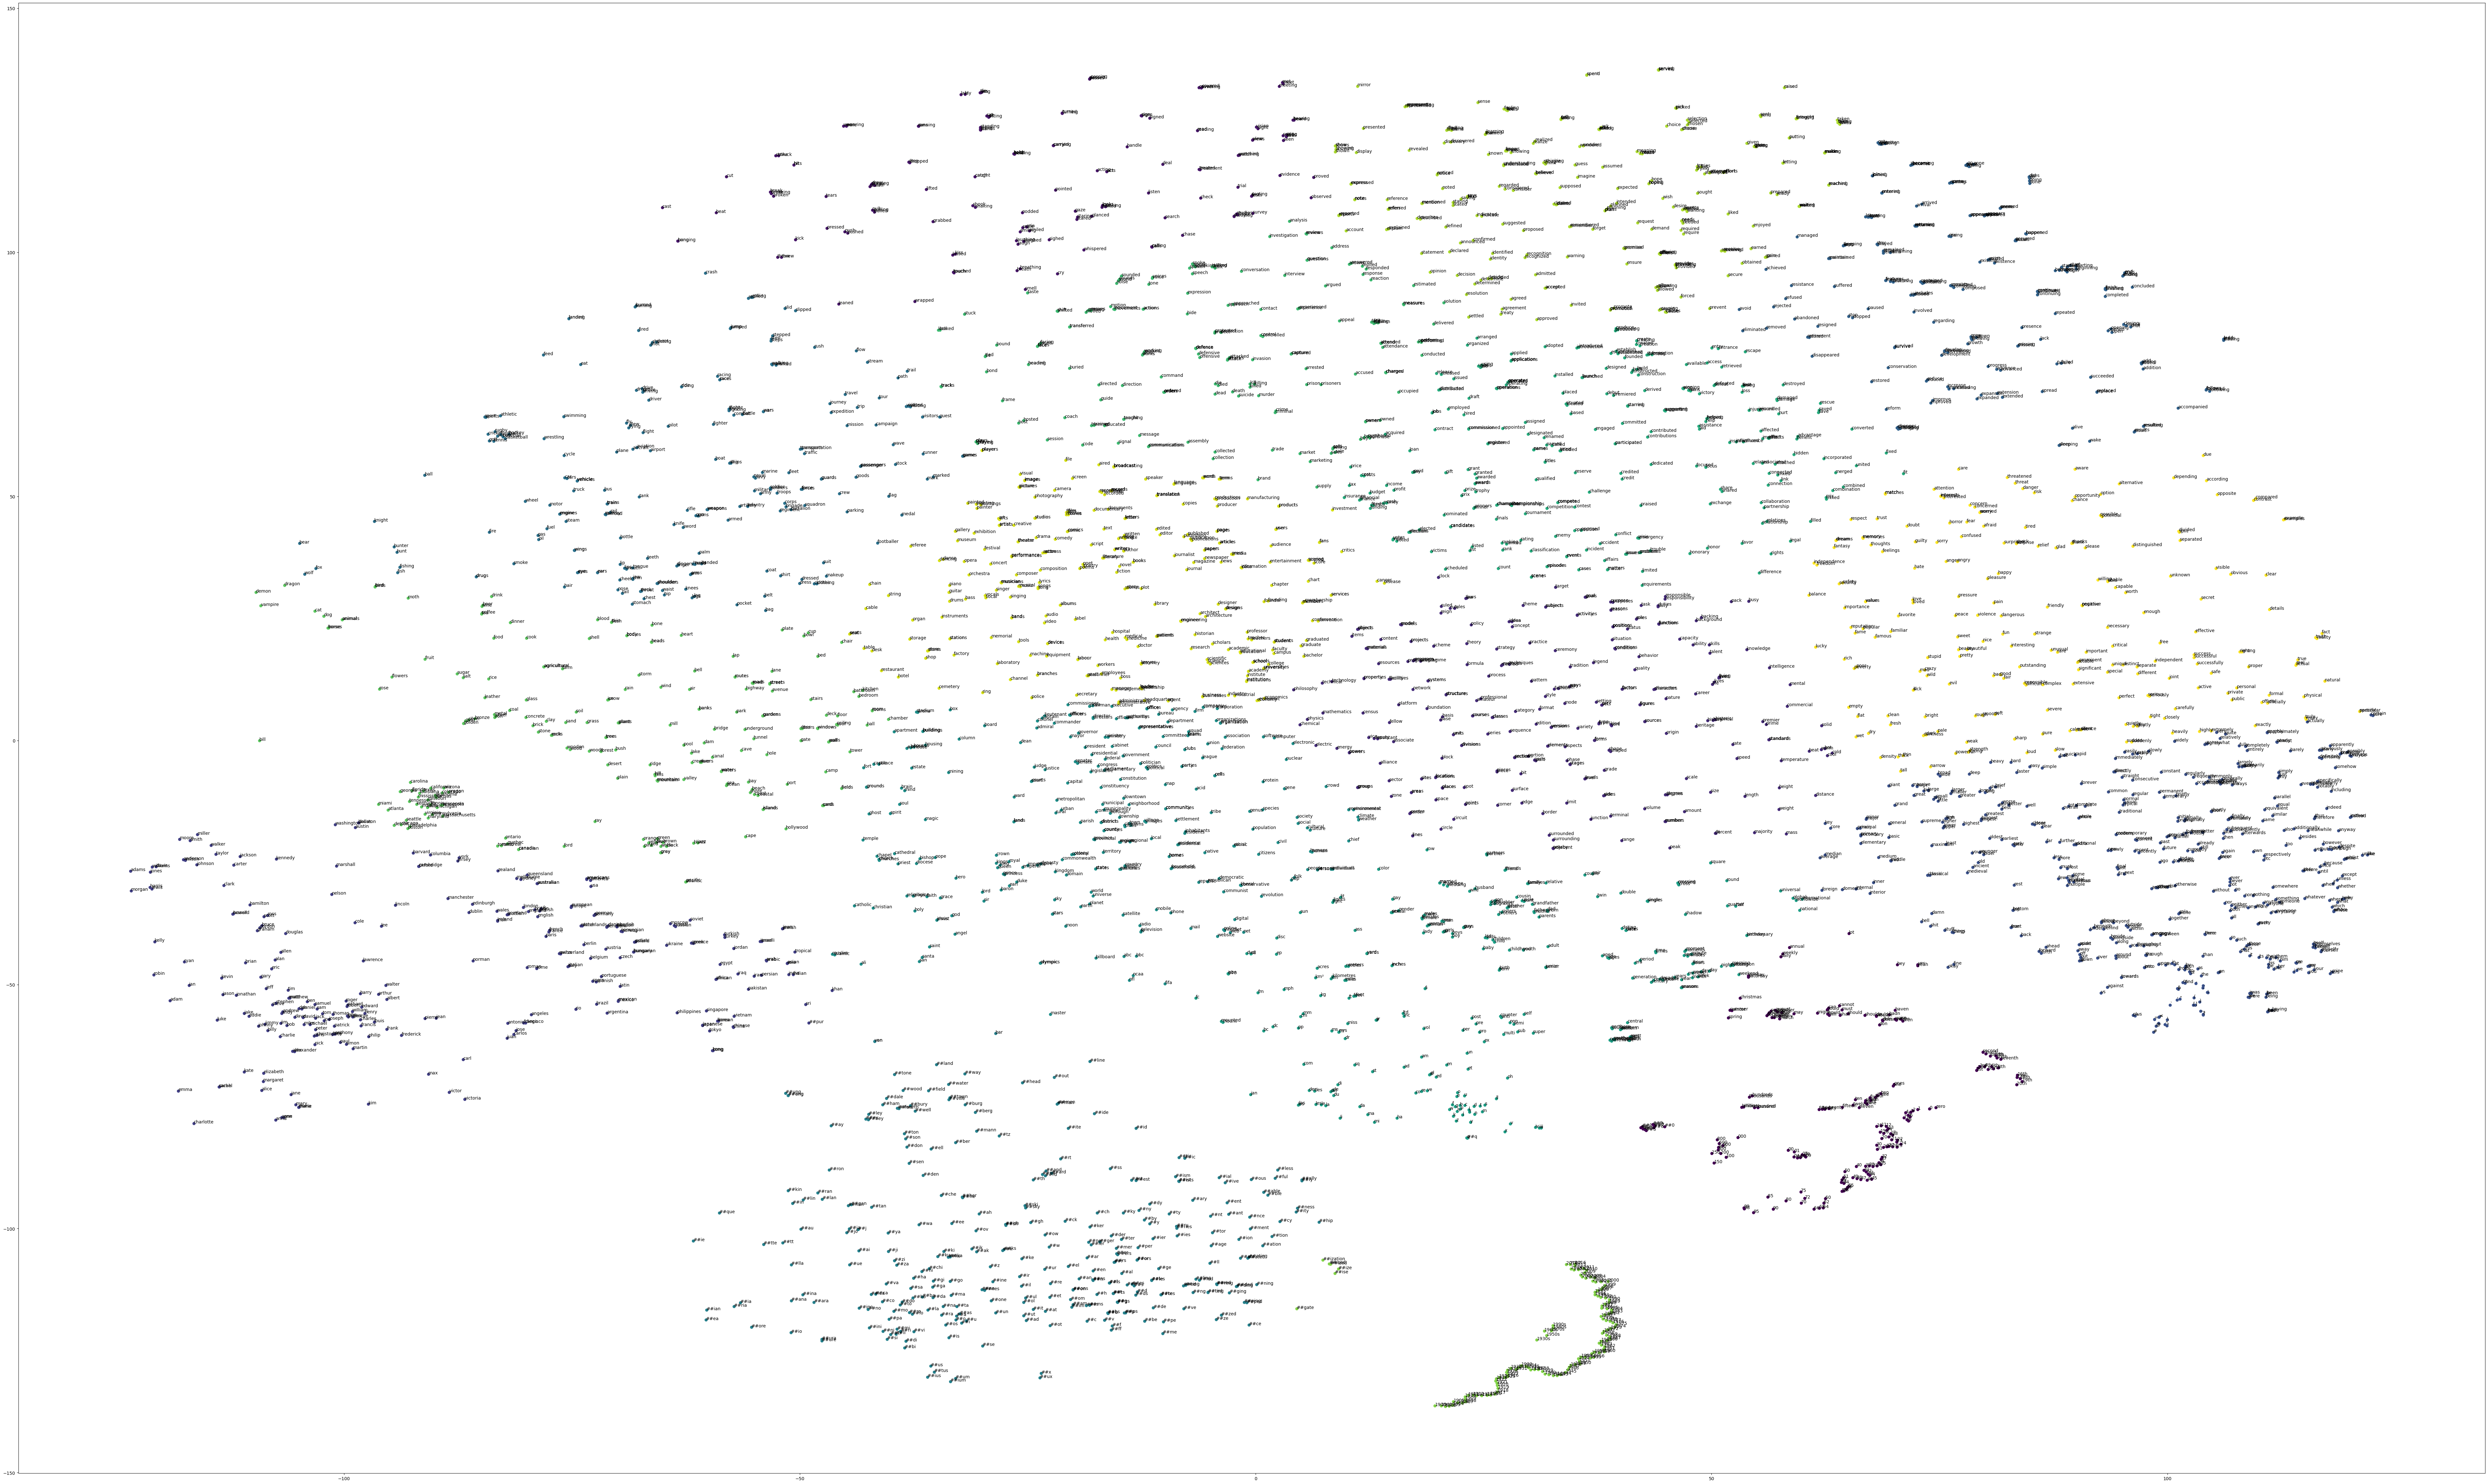

In [16]:
kmeans = KMeans(n_clusters=17, n_init='auto')
kmeans.fit(bert_word_embs_to_use_tsne[:4000])

# Plot the transformed BERT vocabulary embeddings:
plt.rcParams['figure.figsize'] = [100, 60]
fig = plt.figure()
alltexts = list()
for i, txt in enumerate(bert_words_to_plot):
    plt.scatter(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], c=kmeans.labels_[i], vmin = min(kmeans.labels_), vmax = max(kmeans.labels_)) #s=0, 
    currtext = plt.text(bert_word_embs_to_use_tsne[i,0], bert_word_embs_to_use_tsne[i,1], txt, family='sans-serif') #, c=kmeans.labels_[i]/20, vmin = 0, vmax = max(kmeans.labels_))
    alltexts.append(currtext)
    

# Save the plot before adjusting.
plt.savefig('clusters1.pdf', format='pdf')

plt.show

# Conclusion on Homework:  Problem 2 - Embedding
The code has been modified to zoom in on various regions of the projections, and to identify interesting clusters of tokens. Three clusters have been plotted: Units, Human Names, and Geographical Names. In addition, an automated clustering has been implemented using KMeans. The automated approach does not work well on this particular problem and needs a lot of adjustments since the borders between clusters are hardly distinguishable.